In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
# Load the MNIST datase
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
print("Checking for NaN values in x_train:", np.isnan(x_train).sum())
print("Checking for NaN values in y_train:", np.isnan(y_train).sum())
print("Checking for NaN values in x_test:", np.isnan(x_test).sum())
print("Checking for NaN values in y_test:", np.isnan(y_test).sum())

Checking for NaN values in x_train: 0
Checking for NaN values in y_train: 0
Checking for NaN values in x_test: 0
Checking for NaN values in y_test: 0


In [11]:
# reshape and normalize the data set
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize to 0-1
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)

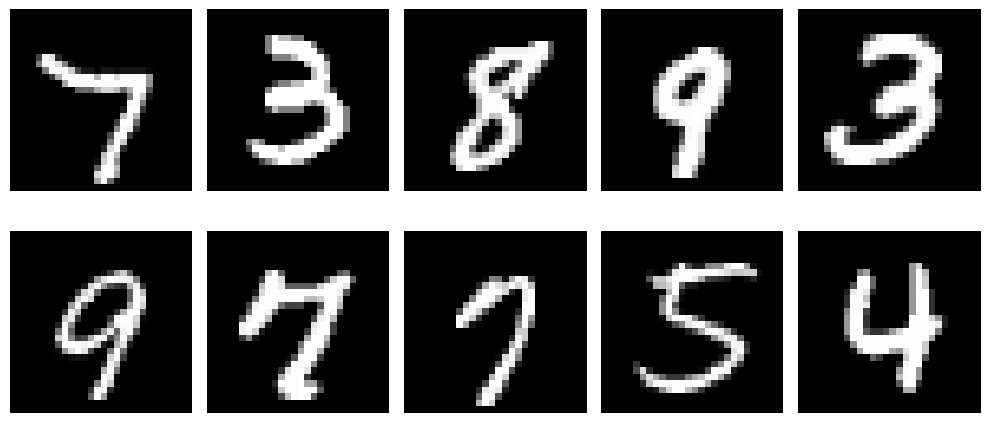

In [12]:
np.random.seed(42)

# Randomly select 10 indices
random_indices = np.random.choice(x_train.shape[0], 10, replace=False)
plt.figure(figsize=(10, 5))

for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1) 
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off') 

plt.tight_layout()
plt.show() # display the random numbers

In [13]:
# Step 3: relu activation function
model1 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer

    # Flatten the output for the Dense layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Dense layer with 64 neurons
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (0-9 digits)
])

model1.compile(optimizer='adam',               
              loss='categorical_crossentropy',
              metrics=['accuracy'])           

model1_initial_weights = model1.get_weights()

history_model1 = model1.fit(x_train, y_train_encoded, epochs=10, batch_size=64, validation_split=0.1, verbose=0)


test_loss, test_acc = model1.evaluate(x_test, y_test_encoded)
print(f"Test 1 accuracy: {test_acc}")

# created second model without the third convolutional layer and second max pooling layer for architecture comparison

model1_2 = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 


    layers.Flatten(),
    layers.Dense(64, activation='relu'), 
    layers.Dropout(0.5),  
    layers.Dense(10, activation='softmax') 
])

model1_2.compile(optimizer='adam',              
              loss='categorical_crossentropy',
              metrics=['accuracy'])            

# Experimented with a different architecture, model1_2, with one less Convolutional Layer, to compare results
test_loss, test_acc = model1_2.evaluate(x_test, y_test_encoded)
print(f"Test 1.5 accuracy (testing different architecture): {test_acc}")

2024-11-01 14:21:43.643491: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 1s 2ms/step - loss: 0.0344 - accuracy: 0.9903
Test 1 accuracy: 0.9902999997138977
313/313 [==============================] - 1s 2ms/step - loss: 2.2985 - accuracy: 0.1206
Test 1.5 accuracy (testing different architecture): 0.12060000002384186


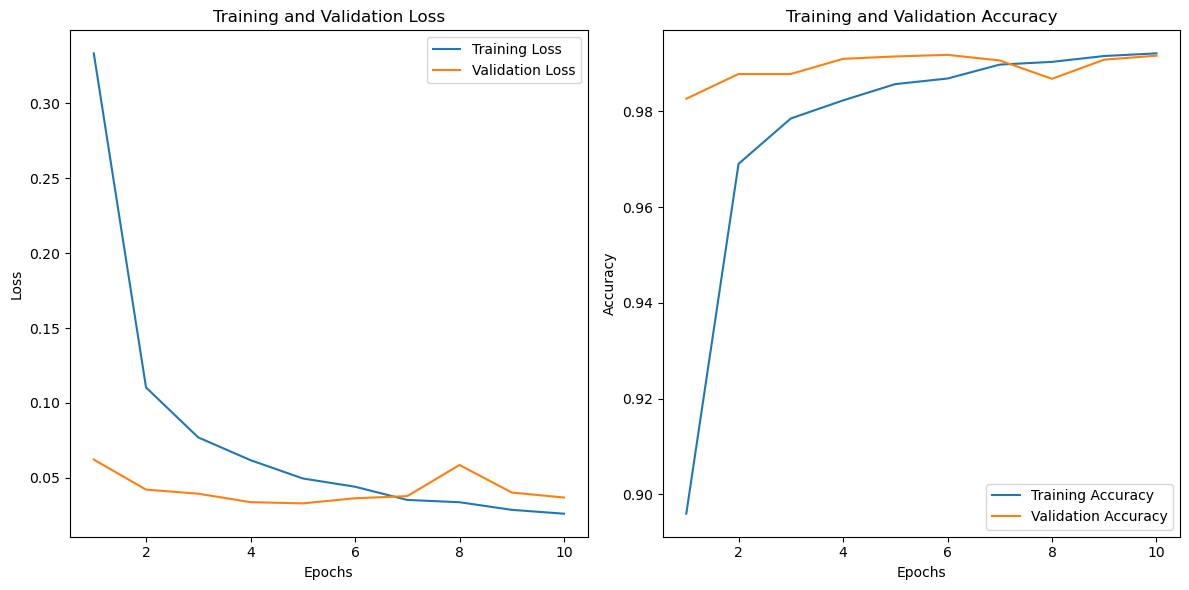

313/313 [==============================] - 1s 2ms/step


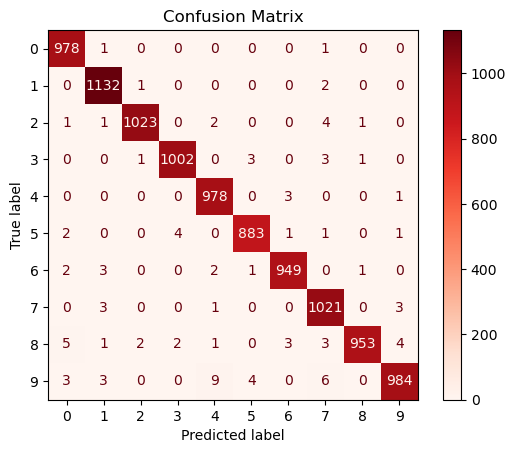

In [14]:
# Step 1: Plot the loss and accuracy for training and validation
epochs = range(1, len(history_model1.history['loss']) + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_model1.history['loss'], label='Training Loss')
plt.plot(epochs, history_model1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_model1.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_model1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 2: Evaluate on the test set and create a confusion matrix
y_pred = np.argmax(model1.predict(x_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

In [15]:
# sigmoid activation function, followed by experiment with epochs
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='sigmoid'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='sigmoid'), 


    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'), 
    layers.Dropout(0.5), 
    layers.Dense(10, activation='softmax') 
])

# Step 4: Compile the model
model2.compile(optimizer='adam',               
              loss='categorical_crossentropy',  
              metrics=['accuracy'])           
model2_initial_weights = model2.get_weights()

# Step 5: Train the model
history = model2.fit(x_train, y_train_encoded, epochs=10, batch_size=64, validation_split=0.1, verbose=0)

test_loss, test_acc = model2.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_acc}")

model2.set_weights(model2_initial_weights)
model2.compile(optimizer='adam',                
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


model2.fit(x_train, y_train_encoded, epochs=5, batch_size=64, validation_split=0.1, verbose=0) #experiment with epochs
# Step 6: Evaluate the model on test data
test_loss, test_acc = model2.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_acc}")

# Step 7: Make predictions (optional)
predictions = model2.predict(x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9879
Test accuracy: 0.9879000186920166
313/313 [==============================] - 1s 2ms/step - loss: 0.0594 - accuracy: 0.9801
Test accuracy: 0.9800999760627747
313/313 [==============================] - 1s 2ms/step


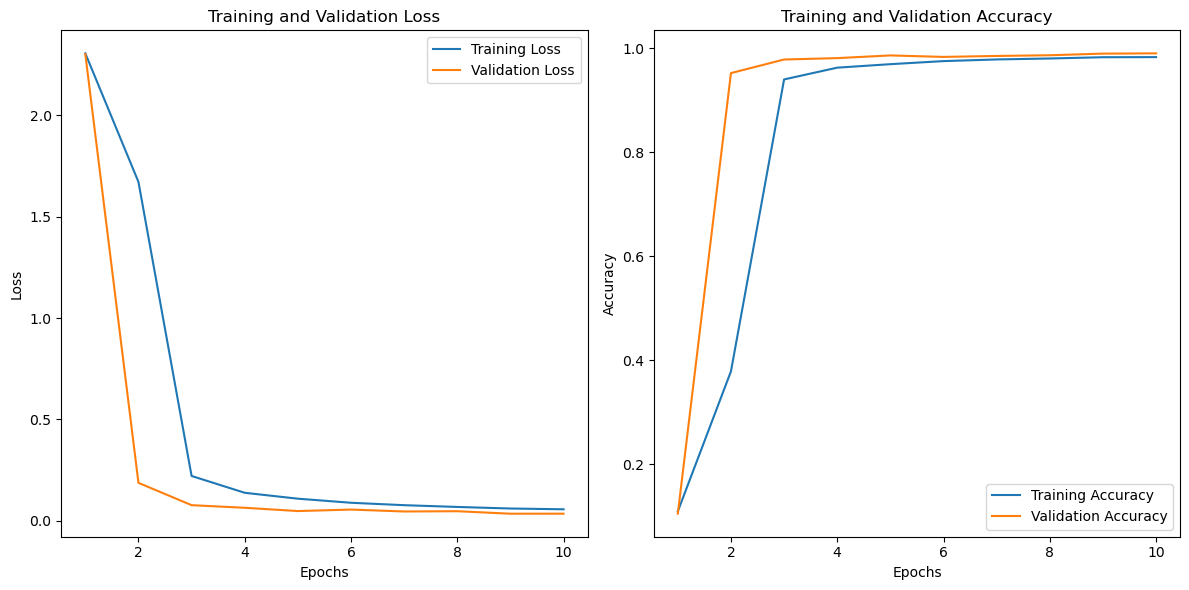

313/313 [==============================] - 1s 2ms/step


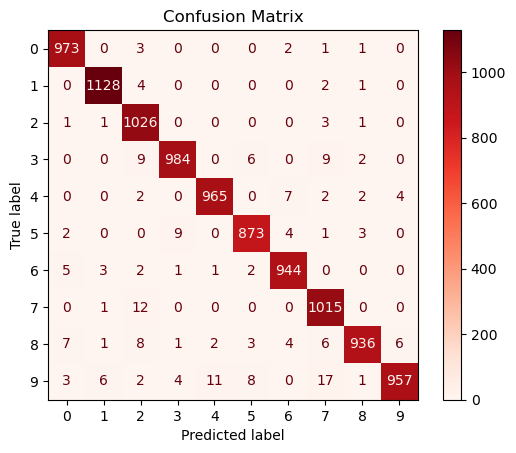

In [16]:

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


y_pred = np.argmax(model2.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

In [17]:
# tanh activation function, then experiemented with batch size of 32
model3 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),

    layers.Flatten(),
    layers.Dense(64, activation='tanh'), 
    layers.Dropout(0.5), 
    layers.Dense(10, activation='softmax') 
])


model3.compile(optimizer='adam',              
              loss='categorical_crossentropy',  
              metrics=['accuracy'])             

history3 = model3.fit(x_train, y_train_encoded, epochs=10, batch_size=64, validation_split=0.1, verbose=0)


test_loss, test_acc = model3.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_acc}")

predictions = model3.predict(x_test)

model2.set_weights(model2_initial_weights)
model2.compile(optimizer='adam',            
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


model2.fit(x_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1, verbose=0) #experiment with batch size
test_loss, test_acc = model2.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0296 - accuracy: 0.9902
Test accuracy: 0.9901999831199646
313/313 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9879
Test accuracy: 0.9879000186920166


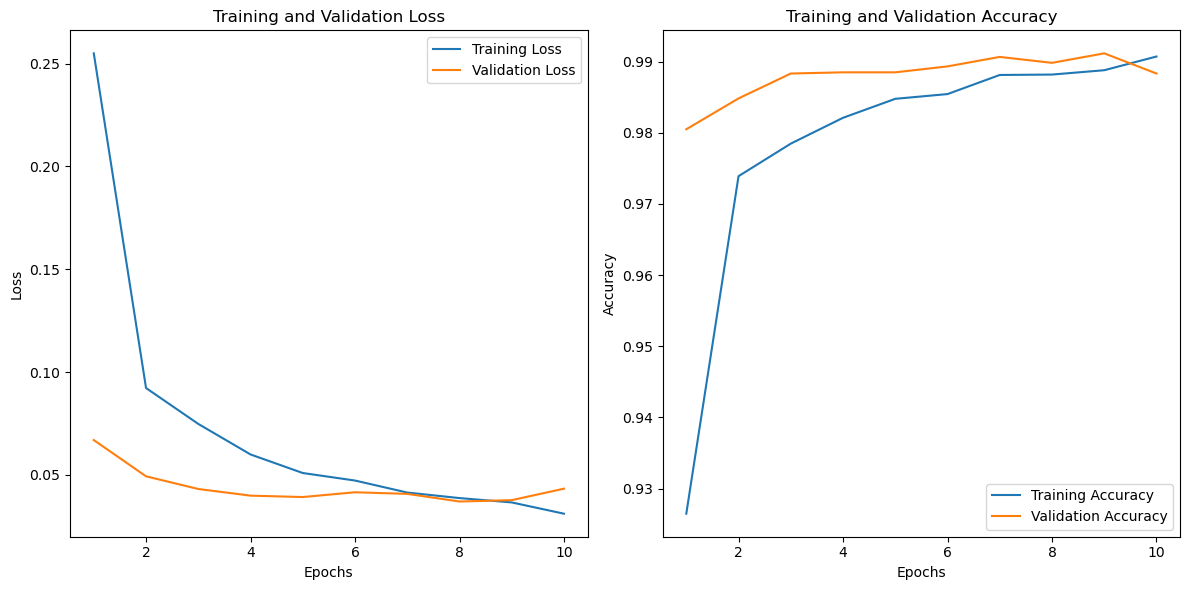

313/313 [==============================] - 1s 2ms/step


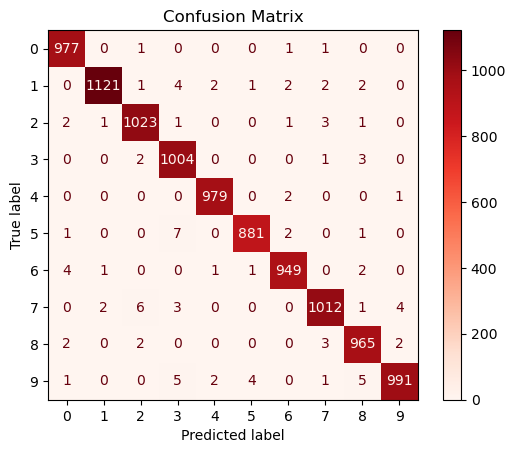

In [18]:

epochs = range(1, len(history3.history['loss']) + 1)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(epochs, history3.history['loss'], label='Training Loss')
plt.plot(epochs, history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history3.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


y_pred = np.argmax(model3.predict(x_test), axis=1)


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()